# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

## A) Verifique os tipos de dados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

## A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## B) Verifique o balanceamento da váriavel Target.

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: xlabel='quality'>

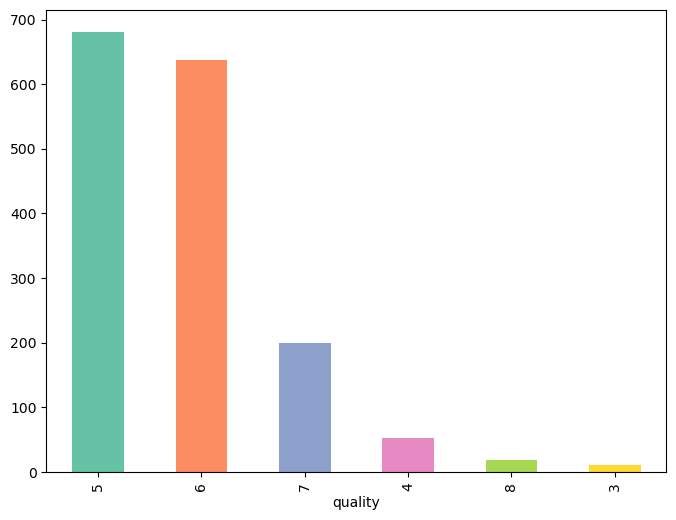

In [6]:
contagem = df['quality'].value_counts()
plt.figure(figsize=(8, 6))
cores = sns.color_palette("Set2", n_colors=df['quality'].nunique())
contagem.plot(kind='bar', color=cores)

In [7]:
# Calcular e imprimir as porcentagens dos valores na coluna
print((df['quality'].value_counts(normalize=True) * 100))

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64


## C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

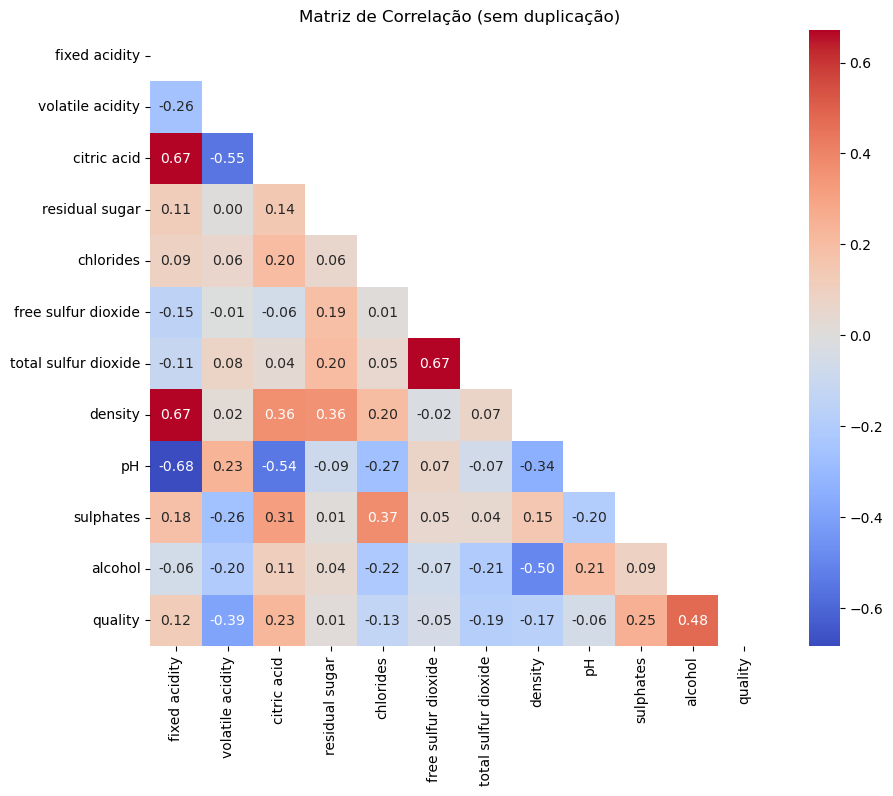

In [10]:
# Calcular a matriz de correlação
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Criar uma máscara para a metade superior
mascara = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotar o mapa de calor com a máscara
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mascara, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação (sem duplicação)')
plt.show()

## D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
df = df[['fixed acidity', 'volatile acidity', 'citric acid',
         'chlorides', 'total sulfur dioxide', 'density',
         'sulphates', 'alcohol', 'quality']]

# 3 - Preparação Final dos Dados

## A) Separe a base em X(Features) e Y(Target)

In [14]:
# Separando em X (variáveis de entrada) e Y (variável de saída)
X = df.drop('quality', axis=1) # X contém todas as colunas, exceto 'quality'
Y = df['quality']  # Y contém apenas a coluna 'quality'

## B) Separe a base em treino e teste.

In [15]:
# Separar em base de treino e teste (usando 80% para treino e 20% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4 - Modelagem

## A) Inicie e treine o modelo de Random Forest

In [16]:
# Iniciando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [17]:
# Treinando o modelo
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## B) Aplique a base de teste o modelo.

In [18]:
# Fazendo previsões no conjunto de teste
Y_pred = rf_model.predict(X_test)

# 5 - Avaliação

## A) Avalie as principais métricas da Classificação e traga insights acerca do resultado, interprete os valores achados.

In [19]:
# Avaliando o modelo
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.66
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.77      0.74       130
           6       0.63      0.70      0.66       132
           7       0.65      0.48      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

Matriz de Confusão:
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 100  30   0   0]
 [  0   0  33  92   7   0]
 [  0   0   0  21  20   1]
 [  0   0   0   1   4   0]]


c:\Users\emers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


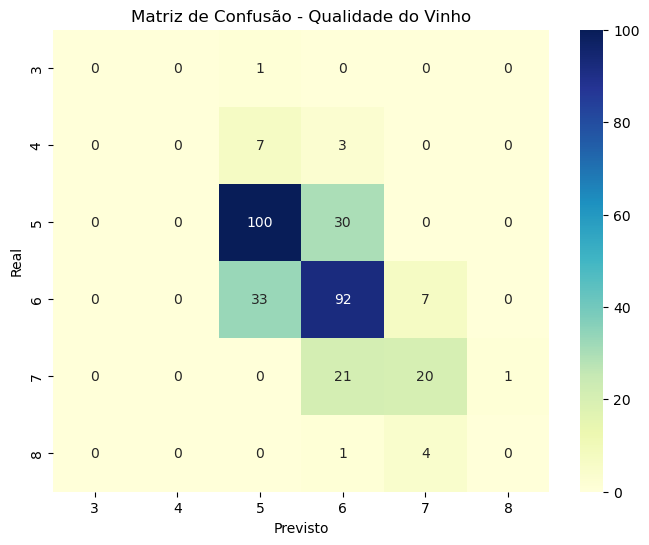

In [20]:
# Classes que você quer mostrar (ordenadas)
labels = [3, 4, 5, 6, 7, 8]

# Gerar matriz de confusão
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=labels)

# Plotar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Qualidade do Vinho')
plt.show()

## B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.

O modelo teve dificuldade para prever corretamente as classes 3, 4 e 8. Pela minha experiência, acredito que isso está diretamente ligado ao desbalanceamento dos dados, já que há poucas amostras representando essas classes. Com poucos exemplos o modelo acaba tendo dificuldade para aprender os padrões dessas categorias e por conta disso, ele tende a ter mais facilidade com as classes com mais registros, o que acaba comprometendo sua capacidade de generalizar para as classes menos amostragens.

# 5 - Melhorando os Hyperparametros

## A) Defina o Grid de parametros que você quer testar

In [21]:
# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

## B) Inicie e Treine um novo modelo utilizando o random search.

In [22]:
# Configurando o Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

In [23]:
# Executando o Randomized Search
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [24]:
# Obtendo os melhores hiperparâmetros através do método randomico
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [25]:
# Treinando o modelo com os melhores hiperparâmetros encontrados acima
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

## C) Avalie os resultados do modelo.

In [26]:
Y_pred = best_rf_model.predict(X_test)

In [27]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.65
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.69      0.75      0.72       130
           6       0.61      0.69      0.65       132
           7       0.63      0.45      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.31      0.32       320
weighted avg       0.62      0.65      0.63       320

Matriz de Confusão:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 97 32  1  0]
 [ 0  0 35 91  6  0]
 [ 0  0  0 22 19  1]
 [ 0  0  0  1  4  0]]


c:\Users\emers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


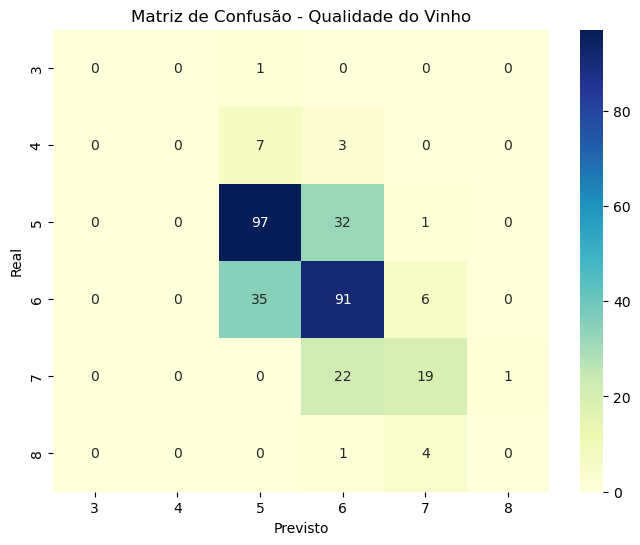

In [28]:
# Classes que você quer mostrar (ordenadas)
labels = [3, 4, 5, 6, 7, 8]

# Gerar matriz de confusão
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=labels)

# Plotar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Qualidade do Vinho')
plt.show()

## D) Você identificou melhorias no modelo após aplicar o random search? Justifique.
ps. Essa parte da atividade demorará um pouco para rodar!

Comparando os resultados dos dois modelos, notei uma diferença geral na acurácia. Após o ajuste dos hiperparâmetros, a acurácia caiu de 0.66 para 0.65. Também houve queda nas métricas de precisão, recall e f1-score, inclusive nas classes que anteriormente eram melhor previstas. De forma geral, o modelo apresentou uma leve piora no desempenho após os ajustes.

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Acredito que para melhorar o desempenho do modelo o melhor seria aplicar técnicas que ainda não utilizamos nessa atividade, como o balanceamento dos dados, a padronização das variáveis e a utilização de um modelo mais robusto. Essa abordagem pode melhorar a capacidade de generalização do modelo.